In [2]:
#Load Libraries:
import sys
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

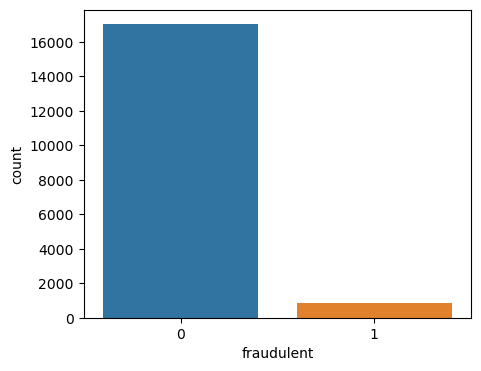

In [3]:
#Set Target variable and read dataset

targetVariable = 'fraudulent'

df = pd.read_csv('fake_job_postings.csv')

plt.figure(figsize=(5,4))
sns.countplot(df['fraudulent']);

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


<AxesSubplot:>

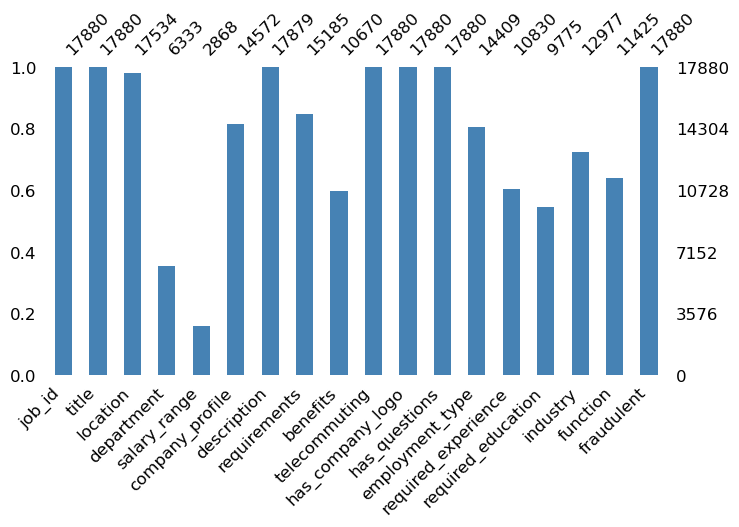

In [5]:
#Plot showing missing values in each column
missing_data = df.isnull()
print(missing_data.sum())


import missingno as msno

msno.bar(df, figsize=(8, 4), fontsize=12, color='steelblue')

In [6]:
# Check if there is any null value
df.isna().apply(pd.value_counts)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
False,17880.0,17880.0,17534,6333,2868,14572,17879,15185,10670,17880.0,17880.0,17880.0,14409,10830,9775,12977,11425,17880.0
True,NaN,NaN,346,11547,15012,3308,1,2695,7210,NaN,NaN,NaN,3471,7050,8105,4903,6455,NaN


In [7]:
# Data Processing - Columnar Analysis: 

def dp_columns(df):
    df.replace('?' , np.nan , inplace = True )
    
    nulls = (df.shape[0] - df.dropna(axis = 0).shape[0])
    nulls_per = (df.shape[0] - df.dropna(axis = 0).shape[0]) / df.shape[0]
    
    dup , dup_per = df.duplicated().sum() , (df.duplicated().sum()) / df.shape[0]
    
    # ---- Identify Numerical Columns ----
    numerical_columns = list((df.select_dtypes(include=np.number)).columns)
            
    # ---- Identify Categorical Columns ----        
    categorical_columns = list(df.select_dtypes(include = ['object']).columns)
    
    
    x = []
    for col in df.columns : 
        x.append([col , df[col].unique() ,df[col].nunique(),df[col].dtype,df[col].isna().sum(),int((df[col].isna().sum())/df.shape[0] * 100)  ])

    x = pd.DataFrame(x ,columns=['Feature','Unique_Values','Count(Unique values)','DataType','Count(Nulls)','Nulls %'])

    print('\n','There is : {}  Nulls, Representing {} % of The Data'.format(nulls , '%.2f'%nulls_per ))
    print('\n','There is : {}  Duplicated, Representing {} % of The Data'.format(dup , '%.2f'%dup_per))
    print('\n','Numerical Columns : {}'.format(numerical_columns))
    print('\n','Categorical Columns : {}'.format(categorical_columns))

    return x

In [8]:
dp_columns(df)


 There is : 17106  Nulls, Representing 0.96 % of The Data

 There is : 0  Duplicated, Representing 0.00 % of The Data

 Numerical Columns : ['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']

 Categorical Columns : ['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']


,Feature,Unique_Values,Count(Unique values),DataType,Count(Nulls),Nulls %
0,job_id,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",17880,int64,0,0
1,title,"[Marketing Intern, Customer Service - Cloud Vi...",11231,object,0,0
2,location,"[US, NY, New York, NZ, , Auckland, US, IA, Wev...",3105,object,346,1
3,department,"[Marketing, Success, nan, Sales, ANDROIDPIT, H...",1337,object,11547,64
4,salary_range,"[nan, 20000-28000, 100000-120000, 120000-15000...",874,object,15012,83
5,company_profile,"[We're Food52, and we've created a groundbreak...",1709,object,3308,18
6,description,"[Food52, a fast-growing, James Beard Award-win...",14801,object,1,0
7,requirements,[Experience with content management systems a ...,11968,object,2695,15
8,benefits,"[nan, What you will get from usThrough being p...",6205,object,7210,40
9,telecommuting,"[0, 1]",2,int64,0,0


In [9]:
df.drop('job_id' , axis = 1 ,inplace = True)
df.reset_index(drop=True ,inplace=True)

In [10]:
df

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [11]:
df['location'] = df['location'].fillna(value = df['location'].value_counts().index[0])

df['location']

0            US, NY, New York
1              NZ, , Auckland
2               US, IA, Wever
3          US, DC, Washington
4          US, FL, Fort Worth
                 ...         
17875         CA, ON, Toronto
17876    US, PA, Philadelphia
17877         US, TX, Houston
17878           NG, LA, Lagos
17879       NZ, N, Wellington
Name: location, Length: 17880, dtype: object

In [12]:
df.loc[df['salary_range'].isnull(), 'salary_range'] = 'Not disclosed'

In [13]:
for idx in (df[df['department'].isna()]['title'].index) :
    if 'Marketing' in df.at[idx ,'title' ] :
        df.at[idx , 'department'] = 'Marketing'
    elif 'Sales' in df.at[idx ,'title' ] :
        df.at[idx , 'department'] = 'Sales'
    elif ('Accountant' in df.at[idx ,'title' ])|('Accounting' in df.at[idx ,'title' ] ) :
        df.at[idx , 'department'] = 'Accounting'
    elif ('Engineer' in df.at[idx ,'title' ] )|('Engineering' in df.at[idx ,'title' ] ) :
        df.at[idx , 'department'] = 'Engineering'
    else :
        df.at[idx , 'department'] = df.at[idx , 'title']
    

In [14]:
df[['company_profile' , 'description','requirements','benefits']] = df[['company_profile' , 'description','requirements','benefits']].fillna('no available data')

In [15]:
dp_columns(df)


 There is : 10265  Nulls, Representing 0.57 % of The Data

 There is : 281  Duplicated, Representing 0.02 % of The Data

 Numerical Columns : ['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']

 Categorical Columns : ['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']


,Feature,Unique_Values,Count(Unique values),DataType,Count(Nulls),Nulls %
0,title,"[Marketing Intern, Customer Service - Cloud Vi...",11231,object,0,0
1,location,"[US, NY, New York, NZ, , Auckland, US, IA, Wev...",3105,object,0,0
2,department,"[Marketing, Success, Commissioning Machinery A...",7151,object,0,0
3,salary_range,"[Not disclosed, 20000-28000, 100000-120000, 12...",875,object,0,0
4,company_profile,"[We're Food52, and we've created a groundbreak...",1710,object,0,0
5,description,"[Food52, a fast-growing, James Beard Award-win...",14802,object,0,0
6,requirements,[Experience with content management systems a ...,11969,object,0,0
7,benefits,"[no available data, What you will get from usT...",6206,object,0,0
8,telecommuting,"[0, 1]",2,int64,0,0
9,has_company_logo,"[1, 0]",2,int64,0,0


In [16]:
df[['industry' , 'function']] = df[['industry' , 'function']].fillna('')
df['job_field'] = df['title'] +' '+ df['department'] +' '+ df['industry'] +' '+ df['function']
df.drop(['title','department','industry','function'] , axis = 1 , inplace = True )

In [17]:
dp_columns(df)


 There is : 9546  Nulls, Representing 0.53 % of The Data

 There is : 281  Duplicated, Representing 0.02 % of The Data

 Numerical Columns : ['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']

 Categorical Columns : ['location', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'job_field']


,Feature,Unique_Values,Count(Unique values),DataType,Count(Nulls),Nulls %
0,location,"[US, NY, New York, NZ, , Auckland, US, IA, Wev...",3105,object,0,0
1,salary_range,"[Not disclosed, 20000-28000, 100000-120000, 12...",875,object,0,0
2,company_profile,"[We're Food52, and we've created a groundbreak...",1710,object,0,0
3,description,"[Food52, a fast-growing, James Beard Award-win...",14802,object,0,0
4,requirements,[Experience with content management systems a ...,11969,object,0,0
5,benefits,"[no available data, What you will get from usT...",6206,object,0,0
6,telecommuting,"[0, 1]",2,int64,0,0
7,has_company_logo,"[1, 0]",2,int64,0,0
8,has_questions,"[0, 1]",2,int64,0,0
9,employment_type,"[Other, Full-time, nan, Part-time, Contract, T...",5,object,3471,19


In [18]:
df[['employment_type','required_experience','required_education']] = df[['employment_type','required_experience','required_education']].fillna('Other')

In [19]:
df['Requirements'] = df['requirements'] +' ' + df['required_experience'] +' ' + df['required_education']
df.drop(['requirements','required_experience','required_education'],axis =  1 ,inplace = True )

In [20]:
dp_columns(df)


 There is : 0  Nulls, Representing 0.00 % of The Data

 There is : 281  Duplicated, Representing 0.02 % of The Data

 Numerical Columns : ['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']

 Categorical Columns : ['location', 'salary_range', 'company_profile', 'description', 'benefits', 'employment_type', 'job_field', 'Requirements']


,Feature,Unique_Values,Count(Unique values),DataType,Count(Nulls),Nulls %
0,location,"[US, NY, New York, NZ, , Auckland, US, IA, Wev...",3105,object,0,0
1,salary_range,"[Not disclosed, 20000-28000, 100000-120000, 12...",875,object,0,0
2,company_profile,"[We're Food52, and we've created a groundbreak...",1710,object,0,0
3,description,"[Food52, a fast-growing, James Beard Award-win...",14802,object,0,0
4,benefits,"[no available data, What you will get from usT...",6206,object,0,0
5,telecommuting,"[0, 1]",2,int64,0,0
6,has_company_logo,"[1, 0]",2,int64,0,0
7,has_questions,"[0, 1]",2,int64,0,0
8,employment_type,"[Other, Full-time, Part-time, Contract, Tempor...",5,object,0,0
9,fraudulent,"[0, 1]",2,int64,0,0


## Text Preprocessing

In [21]:
import re
from nltk.corpus import stopwords 
import string 
from nltk.stem import WordNetLemmatizer
punc = string.punctuation
lmt = WordNetLemmatizer()
s_words = stopwords.words('english')

In [22]:
class TextPreprocessing() :
    def __init__(self, df : pd.DataFrame = pd.DataFrame) :
        self.df = df
        
        
    def Clean(self , df) :
        self.df = df
        df_copy = df.copy(deep = True)
        text_cols = list(df_copy.select_dtypes(include = ['object']).columns)
        for col in text_cols :
            for idx, text in enumerate(df_copy[col]) :
                te = []
                word = re.sub(r'(@|#)\w+' , '' , text)
                word = re.sub("[,.]", "", word)
                word = re.sub(r'https?://\S+' , '' , word)
                word = re.sub(r'(\?|!)+' , '' , word)
                word = re.sub(r"\(|\)", "", word)
                word = re.sub(r'(^\s+)' , '' , word)
                word = re.sub(r'(\s+$)' , '' , word)
                word = re.sub(r'\d+' , '' , word)
                word = word.split()
                for i in word :
                    if (i not in s_words) & (i not in punc) :
                        i = i.lower()
                        i = lmt.lemmatize(i , 'v')
                        te.append(i)
                df_copy.at[idx , col] = te
        return df_copy
    
    def Vactorize (self, df , target_name) :
        self.df = df
        self.target_name = target_name
        df_cleaned = df.copy(deep = True)
        text_cols = list(df_cleaned.select_dtypes(include = ['object']).columns)
        pos_word = {}
        neg_word = {}

        pos_df = df_cleaned[df_cleaned[target_name] == 1].reset_index(drop=True)
        neg_df = df_cleaned[df_cleaned[target_name] == 0].reset_index(drop=True)
        
        for col in text_cols :

            pos_word[col] = [word for sublist in pos_df[col] for word in sublist]
            neg_word[col] = [word for sublist in neg_df[col] for word in sublist]



        pos_freq = {}
        neg_freq = {}
        for key in pos_word.keys() :
            positive_dict = {}
            for word in pos_word[key] :
                positive_dict[word] = positive_dict.get(word , 0) + 1

            pos_freq[key] = positive_dict


        for key in neg_word.keys() :
            negative_dict = {}
            for word in neg_word[key] :
                negative_dict[word] = negative_dict.get(word , 0) + 1

            neg_freq[key] = negative_dict
            
        return pos_freq , neg_freq

        
        
        
    def Vactorization (self , df , target_name) :
        self.df = df
        self.target_name = target_name
        df_cleaned = df.copy(deep = True)
        text_cols = list(df_cleaned.select_dtypes(include = ['object']).columns)
        pos_freq , neg_freq = TextPreprocessing().Vactorize(df_cleaned , target_name)

        for col in text_cols :
            df_cleaned['{}_pos'.format(col)] = 0
            df_cleaned['{}_neg'.format(col)] = 0
            for idx, List in enumerate(df_cleaned[col]) :
                pos_frequent = 0
                neg_frequent = 0
                for word in List :
                    pos_frequent += pos_freq[col].get(word , 0)
                    neg_frequent += neg_freq[col].get(word , 0)



                df_cleaned.at[idx ,'{}_pos'.format(col)] = pos_frequent
                df_cleaned.at[idx ,'{}_neg'.format(col)] = neg_frequent
            df_cleaned.drop([col] , axis = 1 , inplace = True)
        return df_cleaned
    
    
    def fit_transform(self , df , target_name) :
        self.df = df
        self.target_name = target_name
        
        df_cleaned = TextPreprocessing().Clean(df)
        df_vact = TextPreprocessing().Vactorization(df_cleaned , target_name)
        
        return df_vact
    
    
    def Naive_Bayes(self , df, target_name) :
        self.df = df
        self.target_name = target_name
        df_naive = TextPreprocessing().Clean(df)
        pos_freq , neg_freq = TextPreprocessing().Vactorize(df_naive , target_name)
        text_cols = list(df_naive.select_dtypes(include = ['object']).columns)
        
        v_n_pos , v_n_neg = {} , {}

        for key in pos_freq.keys() :
            v_n_pos[key] = len(pos_freq[key])
            n = 0
            for word in pos_freq[key] :
                n += pos_freq[key].get(word , 0)
            v_n_pos[key]+=n
        for key in neg_freq.keys() :
            v_n_neg[key] = len(neg_freq[key])
            n = 0
            for word in neg_freq[key] :
                n += neg_freq[key].get(word , 0)
            v_n_neg[key]+=n
            
            
        prob_pos_dict = {}
        for key in pos_freq.keys():
            positive_dict = {}
            for word in pos_freq[key] :
                positive_dict[word] = (pos_freq[key].get(word , 0) + 1) / (v_n_pos[key])
            prob_pos_dict[key] = positive_dict




        prob_neg_dict = {}
        for key in neg_freq.keys():
            negative_dict = {}
            for word in neg_freq[key] :
                negative_dict[word] = (neg_freq[key].get(word , 0) + 1) / (v_n_neg[key])
            prob_neg_dict[key] = negative_dict
            
            
            
        for col in text_cols :
            df_naive['{}_probs'.format(col)] = 0
            for idx, List in enumerate(df_naive[col]) :
                score = 0
                for word in List :
                    try :
                        b = np.log((prob_pos_dict[col].get(word , 0)) / (prob_neg_dict[col].get(word , 0)))
                        if b == -float('inf') :
                            pass
                        else :
                            score +=b
                    except :
                        pass

                df_naive['{}_probs'.format(col)][idx] = score
            df_naive.drop([col] , axis = 1 , inplace = True)
            
            
        return {'probs_pos':prob_pos_dict ,'probs_neg':prob_neg_dict } , df_naive        

In [23]:
pre = TextPreprocessing()
df_cleaned = pre.Clean(df)
df_cleaned

,location,salary_range,company_profile,description,benefits,telecommuting,has_company_logo,has_questions,employment_type,fraudulent,job_field,Requirements
0,"[us, ny, new, york]","[not, disclose]","[we're, food, we've, create, groundbreaking, a...","[food, fast-growing, jam, beard, award-winning...","[available, data]",0,1,0,[other],0,"[market, intern, market, market]","[experience, content, management, systems, maj..."
1,"[nz, auckland]","[not, disclose]","[second, worlds, cloud, video, production, ser...","[organise, focus, vibrant, awesomedo, passion,...","[what, get, usthrough, part, second, team, gai...",0,1,0,[full-time],0,"[customer, service, cloud, video, production, ...","[what, expect, you:your, key, responsibility, ..."
2,"[us, ia, wever]","[not, disclose]","[valor, service, provide, workforce, solutions...","[our, client, locate, houston, actively, seek,...","[available, data]",0,1,0,[other],0,"[commission, machinery, assistant, cma, commis...","[implement, pre-commissioning, commission, pro..."
3,"[us, dc, washington]","[not, disclose]","[our, passion, improve, quality, life, geograp...","[the, company:, esri, –, environmental, system...","[our, culture, anything, corporate—we, collabo...",0,1,0,[full-time],0,"[account, executive, washington, dc, sales, co...","[education:, bachelor’s, master’s, gi, busines..."
4,"[us, fl, fort, worth]","[not, disclose]","[spotsource, solutions, llc, global, human, ca...","[job, title:, itemization, review, managerloca...","[full, benefit, offer]",0,1,1,[full-time],0,"[bill, review, manager, bill, review, manager,...","[qualifications:rn, license, state, texasdiplo..."
...,...,...,...,...,...,...,...,...,...,...,...,...
17875,"[ca, on, toronto]","[not, disclose]","[vend, look, awesome, new, talent, come, join,...","[just, case, first, time, you’ve, visit, websi...","[what, expect, uswe, open, culture, openly, sh...",0,1,1,[full-time],0,"[account, director, distribution, sales, compu...","[to, ace, role, you:will, eat, comprehensive, ..."
17876,"[us, pa, philadelphia]","[not, disclose]","[weblinc, e-commerce, platform, service, provi...","[the, payroll, accountant, focus, primarily, p...","[health, &amp;, wellnessmedical, planprescript...",0,1,1,[full-time],0,"[payroll, accountant, account, internet, accou...","[ba, bs, accounting-, desire, fun, love-, genu..."
17877,"[us, tx, houston]","[not, disclose]","[we, provide, full, time, permanent, position,...","[experience, project, cost, control, staff, en...","[available, data]",0,0,0,[full-time],0,"[project, cost, control, staff, engineer, cost...","[at, least, years, professional, experienceabi..."
17878,"[ng, la, lagos]","[not, disclose]","[available, data]","[nemsia, studios, look, experience, visual/gra...","[competitive, salary, compensation, base, expe...",0,0,1,[contract],0,"[graphic, designer, graphic, designer, graphic...","[must, fluent, latest, versions, corel, &amp;,..."


In [24]:
df_cleaned = pre.Vactorization(df_cleaned , target_name = 'fraudulent')
df_cleaned

,telecommuting,has_company_logo,has_questions,fraudulent,location_pos,location_neg,salary_range_pos,salary_range_neg,company_profile_pos,company_profile_neg,description_pos,description_neg,benefits_pos,benefits_neg,employment_type_pos,employment_type_neg,job_field_pos,job_field_neg,Requirements_pos,Requirements_neg
0,0,1,0,0,853,12735,1286,28738,1995,134707,7704,150193,851,14426,256,3442,272,10579,4171,95689
1,0,1,0,0,0,576,1286,28738,1931,131239,24366,481510,2479,50113,490,11130,1078,23277,10430,253534
2,0,1,0,0,733,10014,1286,28738,3506,164675,3679,70419,851,14426,256,3442,268,1986,5023,94858
3,0,1,0,0,741,10476,1286,28738,1200,60965,21661,501473,1100,27818,490,11130,463,13517,10626,274678
4,0,1,1,0,773,10422,1286,28738,4067,218576,12204,198024,478,6944,490,11130,521,11354,5614,140183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,1,1,0,177,2720,1286,28738,2929,333665,11276,270803,3360,72531,490,11130,481,13544,8847,209883
17876,0,1,1,0,750,10360,1286,28738,3397,238769,12842,242262,1086,27048,490,11130,227,2437,10439,232128
17877,0,0,0,0,976,10942,1286,28738,972,82121,17188,272612,851,14426,490,11130,785,10210,9061,206172
17878,0,0,1,0,3,58,1286,28738,1191,7840,6227,142583,830,18852,44,1480,48,3905,2605,56417


In [25]:
from sklearn.ensemble import RandomForestClassifier ,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier ,ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,recall_score,precision_score,f1_score ,classification_report, r2_score ,confusion_matrix

In [26]:
x = df_cleaned.drop(['fraudulent'] , axis = 1)
y = df_cleaned['fraudulent']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 , random_state = 42)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

=================== Random Forest Classifer ====================
Train Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11921
           1       1.00      1.00      1.00       595

    accuracy                           1.00     12516
   macro avg       1.00      1.00      1.00     12516
weighted avg       1.00      1.00      1.00     12516

Test Report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      5093
           1       0.95      0.60      0.73       271

    accuracy                           0.98      5364
   macro avg       0.97      0.80      0.86      5364
weighted avg       0.98      0.98      0.98      5364



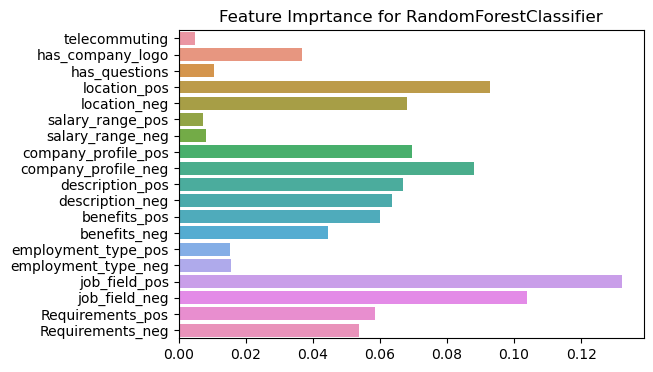

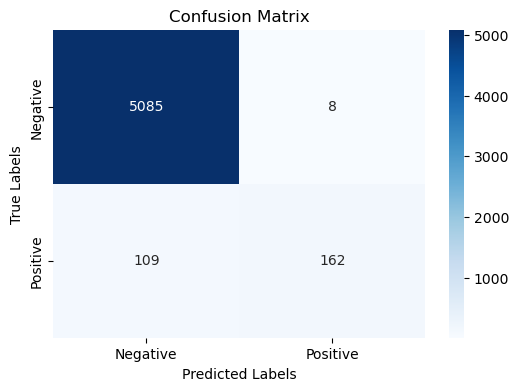

In [29]:
try:
    print('================================================================')
    print('=================== Random Forest Classifer ====================')
    model = RandomForestClassifier(n_estimators=100,n_jobs=-1)
    model.fit(x_train , y_train)

    # Create a feature importance plot using seaborn
    importances = model.feature_importances_
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.barplot(x=importances, y=x.columns)
    plt.title('Feature Imprtance for RandomForestClassifier')
    
    from sklearn.metrics import classification_report
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    train_report = classification_report(y_train , y_train_pred)
    test_report = classification_report(y_test , y_test_pred)
    
    #Reports of Test and Train:
    print('================================================================')
    print('Train Report', '\n', train_report)
    print('Test Report', '\n', test_report)
    print('================================================================')
    
    #Plot Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Set the figure size
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(conf_matrix, cmap='Blues', annot=True, fmt='g')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    labels = ['Negative', 'Positive']
    plt.xticks(np.arange(len(labels))+0.5, labels)
    plt.yticks(np.arange(len(labels))+0.5, labels)
    plt.show()

except Exception as e:
    print("Error processing Random Forest Classifier")
    print(str(e))

Train Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11921
           1       1.00      1.00      1.00       595

    accuracy                           1.00     12516
   macro avg       1.00      1.00      1.00     12516
weighted avg       1.00      1.00      1.00     12516

Test Report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      5093
           1       0.93      0.82      0.87       271

    accuracy                           0.99      5364
   macro avg       0.96      0.91      0.93      5364
weighted avg       0.99      0.99      0.99      5364



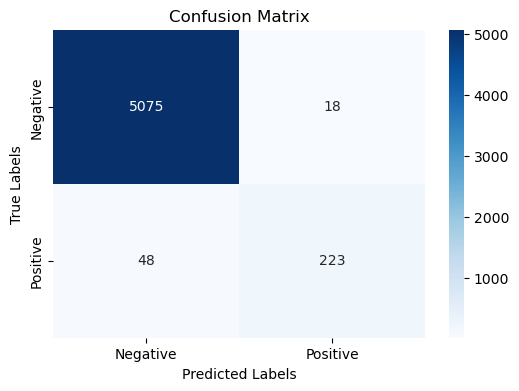

In [91]:
# Naive Bayes

proba , df_naive = pre.Naive_Bayes(df , target_name='fraudulent')

x = df_naive.drop(['fraudulent'] , axis = 1)
y = df_naive['fraudulent']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 , random_state = 42)

model = RandomForestClassifier(n_estimators=200 , n_jobs=-1)
model.fit(x_train , y_train)

from sklearn.metrics import classification_report
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

train_report = classification_report(y_train , y_train_pred)
test_report = classification_report(y_test , y_test_pred)

print('Train Report', '\n', train_report)
print('Test Report', '\n', test_report)



plt.figure(figsize=(6,4))

conf_matrix = confusion_matrix(y_test, y_test_pred)

sns.heatmap(conf_matrix, cmap='Blues', annot=True, fmt='g')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

labels = ['Negative', 'Positive']
plt.xticks(np.arange(len(labels))+0.5, labels)
plt.yticks(np.arange(len(labels))+0.5, labels)

plt.show()


In [90]:
# try:
#     x = df_cleaned.drop(['fraudulent'] , axis = 1)
#     y = df_cleaned['fraudulent']
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 , random_state = 42)
    
#     from sklearn.neighbors import KNeighborsClassifier
#     from sklearn.inspection import permutation_importance

#     print('================================================================')
#     print('=============== K Nearest Neighbours Classifer =================')
#     model = KNeighborsClassifier(n_neighbors=3)
#     model.fit(x_train , y_train)

#     # Create a feature importance plot using seaborn
#     importances = permutation_importance(model, x, y, n_repeats=2, random_state=0)

#     # Create a feature importance plot using matplotlib
#     plt.bar(x.columns, importances.importances_mean)
#     plt.xticks(rotation=90)
#     plt.xlabel('Features')
#     plt.ylabel('Importance')
#     plt.title('Feature Importance Plot for KNN Classifier')
#     plt.show()
    
#     from sklearn.metrics import classification_report
    
#     y_train_pred = model.predict(x_train)
#     y_test_pred = model.predict(x_test)
#     train_report = classification_report(y_train , y_train_pred)
#     test_report = classification_report(y_test , y_test_pred)
    
#     #Reports of Test and Train:
#     print('================================================================')
#     print('Train Report', '\n', train_report)
#     print('Test Report', '\n', test_report)
#     print('================================================================')
    
#     #Plot Confusion Matrix
#     conf_matrix = confusion_matrix(y_test, y_test_pred)

#     # Set the figure size
#     fig, ax = plt.subplots(figsize=(6, 4))
#     sns.heatmap(conf_matrix, cmap='Blues', annot=True, fmt='g')
#     plt.title('Confusion Matrix')
#     plt.xlabel('Predicted Labels')
#     plt.ylabel('True Labels')
#     labels = ['Negative', 'Positive']
#     plt.xticks(np.arange(len(labels))+0.5, labels)
#     plt.yticks(np.arange(len(labels))+0.5, labels)
#     plt.show()

# except Exception as e:
#     print("Error processing KNN Classifier")
#     print(str(e))

Mean Squared Error: 0.033031154251842686
R^2 Score: 0.31141378943059317


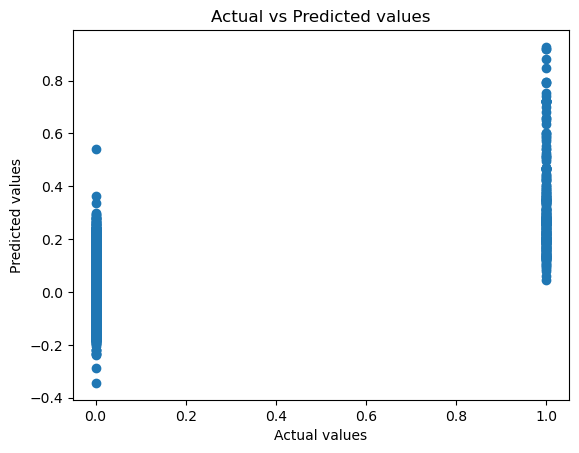

In [55]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np


reg = LinearRegression()

# Fit the model using the training data
reg.fit(x_train, y_train)

# Predict the target values for the test data
y_pred = reg.predict(x_test)

# Compute the mean squared error and R^2 score for the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)



# Plot the data
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.show()

In [53]:
#Perceptron: 

from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# create an instance of the model
model = Perceptron()

# train the model
model.fit(x_train, y_train)

# make predictions
y_pred = model.predict(x_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")




Accuracy: 0.95
Precision: 0.67
Recall: 0.01
F1-score: 0.01


In [51]:
#Linear SVC 

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# create an instance of the model
model = LinearSVC()

# train the model
model.fit(x_train, y_train)

# make predictions
y_pred = model.predict(x_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")



Accuracy: 0.96
Precision: 0.59
Recall: 0.45
F1-score: 0.51


In [50]:
# Stochastic Gradient Descent (SGD) 

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# create an instance of the model
model = SGDClassifier()

# train the model
model.fit(x_train, y_train)

# make predictions
y_pred = model.predict(x_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")



Accuracy: 0.93
Precision: 0.40
Recall: 0.75
F1-score: 0.52


In [49]:
# RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# create an instance of the model
model = RandomForestClassifier()

# train the model
model.fit(x_train, y_train)

# make predictions
y_pred = model.predict(x_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 0.98
Precision: 0.95
Recall: 0.61
F1-score: 0.74


In [58]:
# LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# create an instance of the model
model = LinearDiscriminantAnalysis()

# train the model
model.fit(x_train, y_train)

# make predictions
y_pred = model.predict(x_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")


Accuracy: 0.97
Precision: 0.92
Recall: 0.51
F1 score: 0.66


In [60]:
# AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# create an instance of the model
model = AdaBoostClassifier()

# train the model
model.fit(x_train, y_train)

# make predictions
y_pred = model.predict(x_test)

# calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.97
Precision: 0.79
Recall: 0.53
F1 Score: 0.63


In [62]:
# GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# create an instance of the model
model = GradientBoostingClassifier()

# train the model
model.fit(x_train, y_train)

# make predictions
y_pred = model.predict(x_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 0.98
Precision: 0.91
Recall: 0.59
F1-score: 0.72


In [63]:
# ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# create an instance of the model
model = ExtraTreesClassifier()

# train the model
model.fit(x_train, y_train)

# make predictions
y_pred = model.predict(x_test)

# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 0.98
Precision: 0.97
Recall: 0.63
F1-score: 0.76


In [65]:
# XGBClassifier

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# create an instance of the model
model = XGBClassifier()

# train the model
model.fit(x_train, y_train)

# make predictions
y_pred = model.predict(x_test)

# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 0.98
Precision: 0.94
Recall: 0.72
F1-score: 0.82


Accuracy: 0.95
Precision: 0.60
Recall: 0.30
F1-score: 0.40


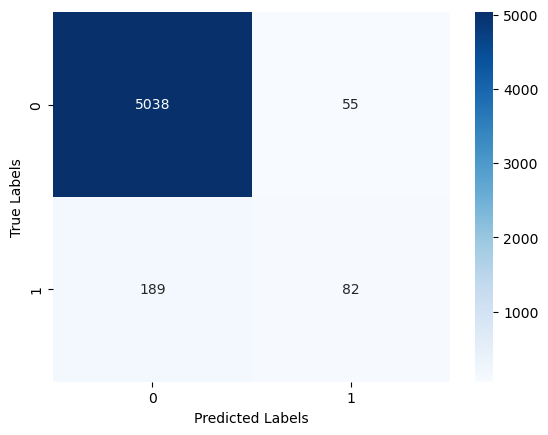

In [67]:
#KNN 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# create an instance of the model
model = KNeighborsClassifier(n_neighbors=5)

# train the model
model.fit(x_train, y_train)

# make predictions
y_pred = model.predict(x_test)

# evaluate the model
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, cmap='Blues', annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5093
           1       0.35      0.34      0.34       271

    accuracy                           0.93      5364
   macro avg       0.66      0.65      0.65      5364
weighted avg       0.93      0.93      0.93      5364



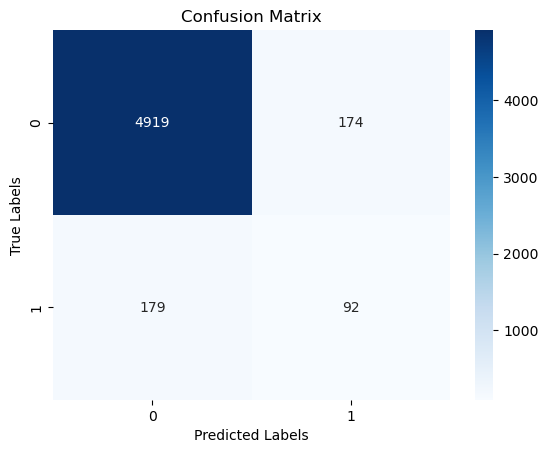

In [69]:
# Gaussian Naive Bayes classifier:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# create an instance of the model
model = GaussianNB()

# train the model
model.fit(x_train, y_train)

# make predictions
y_pred = model.predict(x_test)

# evaluate the model
accuracy = model.score(x_test, y_test)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(report)

# visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

list_of_models = [
    RandomForestClassifier(),
    LogisticRegression(),
	GaussianNB(),
	KNeighborsClassifier(),
	Perceptron(),
	LinearSVC(),
	SGDClassifier(),
	LinearDiscriminantAnalysis(),
	AdaBoostClassifier(),
	GradientBoostingClassifier(),
	ExtraTreesClassifier(), XGBClassifier()]

classification_report = pd.DataFrame(columns=['Accuracy','F1_score','Precision','Recall'])

for model in list_of_models :
    model = model.fit(x_train , y_train)
    for i in range(2) :
        if i == 0 :
            to_pred = x_train
            pred = y_train
            title = 'Train'
            
        else :
            to_pred = x_test
            pred = y_test
            title = 'Test'
        y_pred = model.predict(to_pred)
        
        acc = round(accuracy_score(pred , y_pred)*100)
        f1 = round(f1_score(pred , y_pred)*100)
        prec = round(precision_score(pred , y_pred)*100)
        recall = round(recall_score(pred , y_pred)*100)
        

              
        d = pd.DataFrame(data=np.array([acc,f1,prec,recall]).reshape(1,4) 
                     , columns=['Accuracy' , 'F1_score' , 'Precision' , 'Recall'])  
        # Set display options
        pd.set_option('display.max_colwidth', None)
        pd.set_option('display.unicode.ambiguous_as_wide', True)
        
        classification_report = pd.concat([classification_report , d])
        classification_report.rename( index= { 0 :'{} _ {} Details'.format(model , title) } ,inplace=True )
        
pd.options.display.max_rows = 50
classification_report


,Accuracy,F1_score,Precision,Recall
RandomForestClassifier() _ Train Details,100,100,100,100
RandomForestClassifier() _ Test Details,98,75,99,60
LogisticRegression() _ Train Details,96,56,67,48
LogisticRegression() _ Test Details,97,61,70,54
GaussianNB() _ Train Details,93,29,29,29
GaussianNB() _ Test Details,93,34,35,34
KNeighborsClassifier() _ Train Details,97,53,82,39
KNeighborsClassifier() _ Test Details,95,40,60,30
Perceptron() _ Train Details,95,0,0,0
Perceptron() _ Test Details,95,1,67,1
